In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [5]:
df=pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
X=df.drop("Outcome",axis=1)
Y=df["Outcome"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss=StandardScaler()

In [14]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [15]:
import tensorflow as tf

In [16]:
model=tf.keras.Sequential([
       tf.keras.layers.Input(shape=(X.shape[1],)),
       tf.keras.layers.Dense(1,activation="sigmoid"),
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="sgd",loss="binary_crossentropy")

In [19]:
trained_model=model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
17/17 [==============================] - 0s 1ms/step - loss: 1.1688
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 1.0969
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 1.0620
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 0.9888
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.9162
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 0.8516
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 0.8427
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.8303
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 0.8139
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.7552
Epoch 11/50
17/17 [==============================] - 0s 1ms/step - loss: 0.7097
Epoch 12/50
17/17 [==============================] - 0s 1ms/step - loss: 0.7535
Epoch 13/50
17/17 [==============================

In [20]:
trained_model.history["loss"]

[1.1330806016921997,
 1.0744351148605347,
 1.020216941833496,
 0.9702584743499756,
 0.9246253371238708,
 0.8830132484436035,
 0.8452816605567932,
 0.811286211013794,
 0.7803494930267334,
 0.753114640712738,
 0.728701114654541,
 0.7069280743598938,
 0.6877032518386841,
 0.6706743240356445,
 0.6554476618766785,
 0.641933262348175,
 0.6299250721931458,
 0.6192038655281067,
 0.6095460653305054,
 0.601090669631958,
 0.593403160572052,
 0.5864507555961609,
 0.5800846815109253,
 0.5742795467376709,
 0.5691550970077515,
 0.5644130110740662,
 0.5599755644798279,
 0.5558407306671143,
 0.5521360039710999,
 0.5486945509910583,
 0.5455271005630493,
 0.5425143241882324,
 0.539678692817688,
 0.537013053894043,
 0.5345702171325684,
 0.5322238802909851,
 0.5300461649894714,
 0.5280487537384033,
 0.5261686444282532,
 0.5243839025497437,
 0.5226207971572876,
 0.5209784507751465,
 0.5194063186645508,
 0.5179475545883179,
 0.5166164040565491,
 0.5151788592338562,
 0.5140188336372375,
 0.5127565860748291,
 

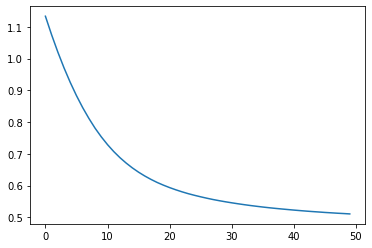

In [21]:
plt.plot(trained_model.history["loss"])
plt.show()

In [23]:
y_pred=model.predict(X_test)

In [24]:
print(y_pred)

[[0.5280131 ]
 [0.301403  ]
 [0.18198466]
 [0.15243328]
 [0.31959778]
 [0.24628496]
 [0.35385966]
 [0.18272093]
 [0.1926369 ]
 [0.2800635 ]
 [0.3588739 ]
 [0.17478198]
 [0.7201727 ]
 [0.70823276]
 [0.05872303]
 [0.6541307 ]
 [0.30305892]
 [0.33234817]
 [0.19300365]
 [0.20359227]
 [0.45595437]
 [0.16068295]
 [0.84018743]
 [0.3039139 ]
 [0.13274533]
 [0.47180113]
 [0.30394834]
 [0.50759953]
 [0.1780405 ]
 [0.3312719 ]
 [0.33506083]
 [0.3307076 ]
 [0.12286064]
 [0.820438  ]
 [0.1749703 ]
 [0.66699576]
 [0.12238735]
 [0.25757444]
 [0.18335316]
 [0.50196654]
 [0.26866275]
 [0.176426  ]
 [0.07754055]
 [0.25249314]
 [0.14239326]
 [0.07517412]
 [0.90653366]
 [0.55919576]
 [0.24453342]
 [0.23383874]
 [0.04382658]
 [0.23011118]
 [0.6787449 ]
 [0.1204657 ]
 [0.54904073]
 [0.16725674]
 [0.4664808 ]
 [0.41870466]
 [0.67962307]
 [0.35128787]
 [0.81209916]
 [0.05161405]
 [0.87294745]
 [0.2769391 ]
 [0.46025112]
 [0.21316049]
 [0.06477147]
 [0.47110954]
 [0.54829997]
 [0.6404897 ]
 [0.85536873]
 [0.69